<a href="https://colab.research.google.com/github/huydoan0212/ProjectMachineLearning/blob/main/ProjectML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Prediction Cancer**

**1. Library and Input File**

In [ ]:
# Import thư viện
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from prettytable import PrettyTable
import warnings
warnings.filterwarnings('ignore')

#Kết nối với ggdriveb
from google.colab import drive
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/data'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/MyDrive/data


**2. Data Loading and Editing**

In [ ]:
#Đọc dữ liệu từ tệp CSV
data = pd.read_csv('Cancer_Data.csv')
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
#Xóa các cột không cần thiết và chuyển đổi nhãn diagnosis thành dạng số (1 cho Malignant và 0 cho Benign).
data.drop(["Unnamed: 32","id"],axis=1,inplace = True)
data.diagnosis = [1 if each == "M" else 0 for each in data.diagnosis]
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [ ]:
# Chia dữ liệu thành biến đầu vào (X) và đầu ra (y)
y = data.diagnosis.values
x_data = data.drop(["diagnosis"],axis = 1)

In [ ]:
print("X Data graph")
pd.DataFrame(x_data)

X Data graph


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
print("Y Data Graph")
pd.DataFrame(y)

Y Data Graph


,0
0,1
1,1
2,1
3,1
4,1
...,...
564,1
565,1
566,1
567,1


**3. Normalization**

In [ ]:
# Chuẩn hóa dữ liệu đầu vào để các giá trị nằm trong khoảng từ 0 đến 1
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data))
print(x)

     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0       0.004229      0.002440        0.028867   0.235308         0.000028   
1       0.004835      0.004177        0.031241   0.311707         0.000020   
2       0.004629      0.004995        0.030559   0.282793         0.000026   
3       0.002685      0.004791        0.018237   0.090762         0.000033   
4       0.004770      0.003371        0.031758   0.304890         0.000024   
..           ...           ...             ...        ...              ...   
564     0.005068      0.005263        0.033380   0.347673         0.000026   
565     0.004732      0.006641        0.030842   0.296427         0.000023   
566     0.003902      0.006601        0.025458   0.201716         0.000020   
567     0.004843      0.006895        0.032934   0.297367         0.000028   
568     0.001824      0.005769        0.011265   0.042548         0.000012   

     compactness_mean  concavity_mean  concave points_mean  sym

**4. Logistic Regression**

In [ ]:
# Chia dữ liệu thành tập huấn luyện (80%) và tập kiểm tra (20%)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Chuyển đổi dữ liệu huấn luyện và kiểm tra thành ma trận chuyển vị
x_train = x_train.T
x_test = x_test.T
y_train = y_train.T
y_test = y_test.T

In [ ]:
# Hàm khởi tạo trọng số và bias với giá trị ban đầu.
def initialize_weights_and_bias(dimension):
    w = np.full((dimension, 1), 0.01)  # Tạo vector trọng số có kích thước "dimension" và giá trị ban đầu là 0.01
    b = 0.0  # Khởi tạo bias bằng 0
    return w, b

In [ ]:
# Hàm sigmoid để chuẩn hóa giá trị đầu ra thành khoảng từ 0 đến 1
def sigmoid(z):
    y_head = 1/(1+np.exp(-z))
    return y_head

In [ ]:
#Hàm này thực hiện việc tính toán giá trị dự đoán và hàm mất mát (forward propagation) và gradient (backward propagation).
def forward_backward_propagation(w, b, x_train, y_train):
    # FORWARD
    z = np.dot(w.T, x_train) + b  # Tính toán giá trị z
    y_head = sigmoid(z)  # Tính giá trị dự đoán y_head
    loss = -y_train * np.log(y_head) - (1 - y_train) * np.log(1 - y_head)  # Tính toán hàm mất mát (loss)
    cost = (np.sum(loss)) / x_train.shape[1]  # Tính toán chi phí (cost)

    # BACKWARD
    derivative_weight = (np.dot(x_train, (y_head - y_train).T)) / x_train.shape[1]  # Tính gradient của trọng số
    derivative_bias = np.sum(y_head - y_train) / x_train.shape[1]  # Tính gradient của bias
    gradients = {"derivative_weight": derivative_weight, "derivative_bias": derivative_bias}  # Lưu gradient vào từ điển
    return cost, gradients

In [ ]:
#Hàm này cập nhật trọng số và bias theo số lần lặp và tốc độ học (learning rate).
def update(w, b, x_train, y_train, learning_rate, number_of_iteration):
    cost_list = []
    cost_list2 = []
    index = []

    for i in range(number_of_iteration):
        # Thực hiện forward và backward propagation để tìm chi phí và gradient
        cost, gradients = forward_backward_propagation(w, b, x_train, y_train)
        cost_list.append(cost)  # Lưu chi phí vào danh sách

        # Cập nhật trọng số và bias
        w = w - learning_rate * gradients["derivative_weight"]
        b = b - learning_rate * gradients["derivative_bias"]

        if i % 10 == 0:
            cost_list2.append(cost)  # Lưu chi phí vào danh sách mỗi 10 lần lặp
            index.append(i)
            print("Cost after iteration %i: %f" % (i, cost))  # In ra chi phí sau mỗi 10 lần lặp

    parameters = {"weight": w, "bias": b}  # Lưu trọng số và bias vào từ điển
    plt.plot(index, cost_list2)
    plt.xticks(index, rotation="vertical")
    plt.xlabel("Number of Iteration")
    plt.ylabel("Cost")
    plt.show()
    return parameters, gradients, cost_list

In [ ]:
#Hàm này dự đoán nhãn cho dữ liệu kiểm tra dựa trên trọng số và bias đã được cập nhật.
def predict(w, b, x_test):
    z = sigmoid(np.dot(w.T, x_test) + b)
    Y_prediction = np.zeros((1, x_test.shape[1]))  # Tạo ma trận dự đoán ban đầu toàn số 0

    for i in range(z.shape[1]):
        if z[0, i] <= 0.5:
            Y_prediction[0, i] = 0
        else:
            Y_prediction[0, i] = 1

    return Y_prediction

Cost after iteration 0: 0.692873
Cost after iteration 10: 0.638682
Cost after iteration 20: 0.614395
Cost after iteration 30: 0.592721
Cost after iteration 40: 0.573297
Cost after iteration 50: 0.555842
Cost after iteration 60: 0.540100
Cost after iteration 70: 0.525848
Cost after iteration 80: 0.512892
Cost after iteration 90: 0.501068
Cost after iteration 100: 0.490236
Cost after iteration 110: 0.480277
Cost after iteration 120: 0.471090
Cost after iteration 130: 0.462587
Cost after iteration 140: 0.454695
Cost after iteration 150: 0.447349
Cost after iteration 160: 0.440494
Cost after iteration 170: 0.434082
Cost after iteration 180: 0.428070
Cost after iteration 190: 0.422422
Cost after iteration 200: 0.417104
Cost after iteration 210: 0.412088
Cost after iteration 220: 0.407349
Cost after iteration 230: 0.402864
Cost after iteration 240: 0.398612
Cost after iteration 250: 0.394575
Cost after iteration 260: 0.390738
Cost after iteration 270: 0.387085
Cost after iteration 280: 0.383

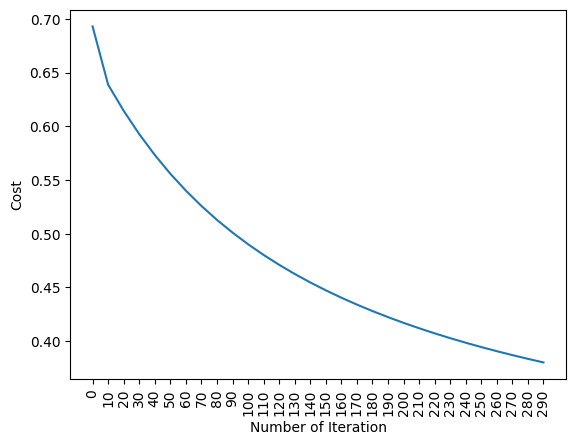

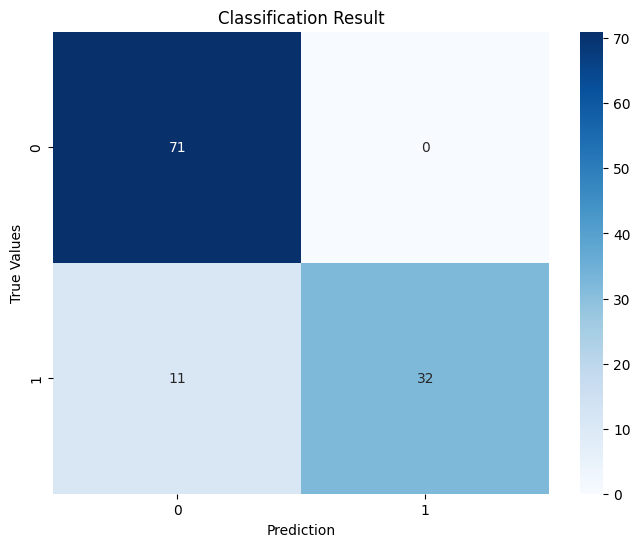



Result Evaluation 
 ------------------------------------

Sum True Prediction: 103

Sum False Prediction: 11

test accuracy: 90.35087719298245 %


In [ ]:
#Hàm này tổng hợp tất cả các bước để xây dựng và huấn luyện mô hình Logistic Regression, sau đó đánh giá và hiển thị kết quả.
def logistic_regression(x_train, y_train, x_test, y_test, learning_rate, num_iterations):
    # initialize
    dimension = x_train.shape[0]  # Lấy kích thước của dữ liệu đầu vào (ở đây là 30)
    w, b = initialize_weights_and_bias(dimension)  # Khởi tạo trọng số và bias

    # Cập nhật trọng số và bias bằng cách sử dụng hàm update
    parameters, gradients, cost_list = update(w, b, x_train, y_train, learning_rate, num_iterations)

    # Dự đoán kết quả trên tập dữ liệu kiểm tra
    y_prediction_test = predict(parameters["weight"], parameters["bias"], x_test)

    # Tạo bảng confusion matrix sử dụng seaborn
    cm = confusion_matrix(y_test, y_prediction_test.reshape(-1))  # Tính confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))  # Vẽ heatmap cho confusion matrix
    plt.xlabel('Prediction')
    plt.ylabel('True Values')
    plt.title('Classification Result')

    # Tính số lượng dự đoán đúng và sai
    correct_predictions = np.trace(cm)  # Số lượng dự đoán đúng là tổng số phần tử trên đường chéo của confusion matrix
    total_predictions = np.sum(cm)  # Tổng số dự đoán
    incorrect_predictions = total_predictions - correct_predictions  # Số lượng dự đoán sai là tổng số dự đoán trừ đi số lượng dự đoán đúng
    plt.show()

    # Đánh giá kết quả
    print("\n")
    print("Result Evaluation \n", "------------------------------------\n")

    print(f'Sum True Prediction: {correct_predictions}\n')  # In ra tổng số dự đoán đúng
    print(f'Sum False Prediction: {incorrect_predictions}\n')  # In ra tổng số dự đoán sai

    # In ra độ chính xác của mô hình trên tập kiểm tra
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))

# Chạy hàm logistic_regression với tập dữ liệu huấn luyện và kiểm tra
logistic_regression(x_train, y_train, x_test, y_test, learning_rate=1, num_iterations=300)


**5. K-NN**

In [ ]:
#Chia dữ liệu thành tập huấn luyện và tập kiểm tra theo tỷ lệ 80:20.
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state=1)

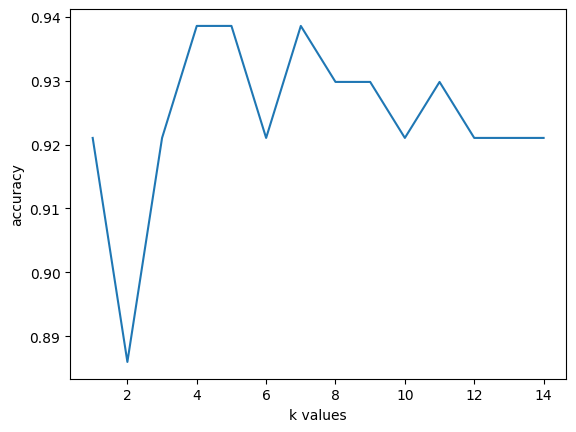

In [ ]:
#Dùng vòng lặp để thử các giá trị k khác nhau từ 1 đến 14 và tính toán độ chính xác của mô hình cho từng giá trị k. Sau đó, vẽ biểu đồ để tìm giá trị k tối ưu.
Score_list = []

for each in range(1,15):
    knn2 = KNeighborsClassifier(n_neighbors = each)
    knn2.fit(x_train,y_train)
    Score_list.append(knn2.score(x_test,y_test))

plt.plot(range(1,15),Score_list)
plt.xlabel("k values")
plt.ylabel("accuracy")
plt.show()

Accuracy Score
------------------------
3 nn Acc Score 0.9210526315789473 
------------------------




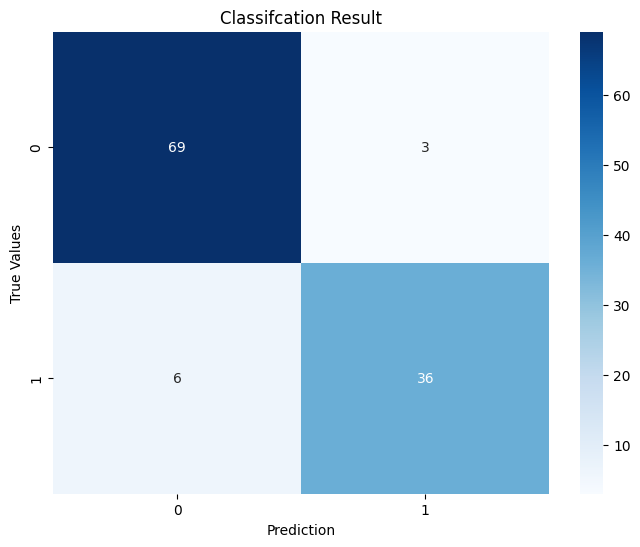



Result Evaluation
------------------------
Sum True Prediction: 105

Sum False Prediction: 9



In [ ]:
#Huấn luyện mô hình KNN với k=3 và dự đoán nhãn cho tập kiểm tra.
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)

#In ra độ chính xác của mô hình trên tập kiểm tra.
print("Accuracy Score")
print("------------------------")
print("{} nn Acc Score {} ".format(3,knn.score(x_test,y_test)))
print("------------------------\n\n")

#Tạo và hiển thị ma trận nhầm lẫn để trực quan hóa kết quả phân loại. Đồng thời tính toán số lượng dự đoán đúng và sai.
cm = confusion_matrix(y_test, prediction.reshape(-1))
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Prediction')
plt.ylabel('True Values')
plt.title('Classifcation Result')
correct_predictions = np.trace(cm)
total_predictions = np.sum(cm)
incorrect_predictions = total_predictions - correct_predictions
plt.show()
#In ra tổng số dự đoán đúng và sai.
print("\n")
print("Result Evaluation")
print("------------------------")
print(f'Sum True Prediction: {correct_predictions}\n')
print(f'Sum False Prediction: {incorrect_predictions}\n')

5. Cancer Prediction With SVM

In [ ]:
#Chia dữ liệu thành tập huấn luyện và tập kiểm tra theo tỷ lệ 80:20.
X_train, X_test, y_train, y_test = train_test_split(x_data, y, test_size=0.2, random_state=101)
model = SVC()
model.fit(X_train, y_train)

SVC()

In [ ]:
#Đánh giá mô hình
predictions = model.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        72
           1       1.00      0.86      0.92        42

    accuracy                           0.95       114
   macro avg       0.96      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



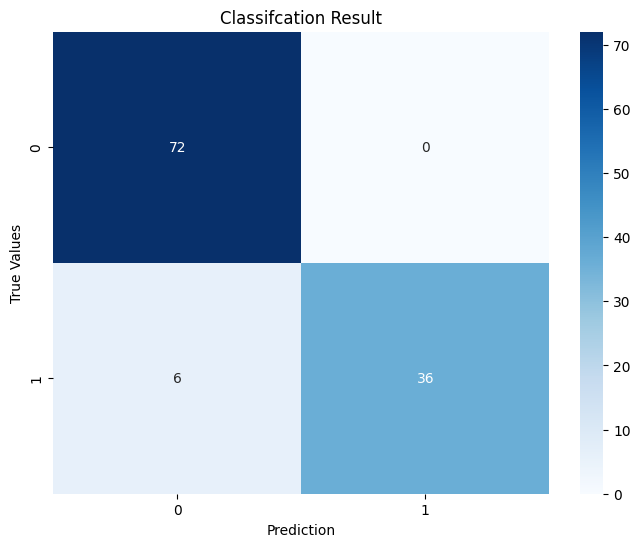

In [ ]:
#Tạo và hiển thị ma trận nhầm lẫn để trực quan hóa kết quả phân loại. Đồng thời tính toán số lượng dự đoán đúng và sai.
cm = confusion_matrix(y_test,predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Prediction')
plt.ylabel('True Values')
plt.title('Classifcation Result')
correct_predictions = np.trace(cm)
total_predictions = np.sum(cm)
incorrect_predictions = total_predictions - correct_predictions
plt.show()

In [ ]:
#Dùng Gridsearch để lựa chọn tham số tốt nhất cho mô hình
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf', 'sigmoid']}
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.626 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.626 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.626 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.626 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.626 total time=   0.0s
[CV 1/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.626 total time=   0.0s
[CV 2/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.626 total time=   0.0s
[CV 3/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.626 total time=   0.0s
[CV 4/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.626 total time=   0.0s
[CV 5/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.626 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.626 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'sigmoid']},
             verbose=3)

In [ ]:
#Kiểm tra param tốt nhất mà GridSearch kiếm ra được
print(grid.best_params_)

{'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}


In [ ]:
print(grid.best_estimator_)

SVC(C=10, gamma=0.0001)


In [ ]:
# Đánh giá lại mô hình từ grid mới tìm ra
grid_predictions = grid.predict(X_test)
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        72
           1       1.00      0.86      0.92        42

    accuracy                           0.95       114
   macro avg       0.96      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



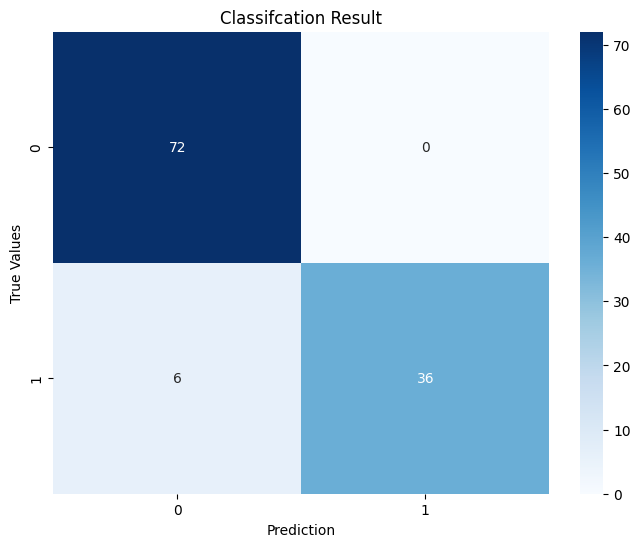

In [ ]:
#Tạo và hiển thị ma trận nhầm lẫn để trực quan hóa kết quả phân loại. Đồng thời tính toán số lượng dự đoán đúng và sai.
cm = confusion_matrix(y_test,grid_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Prediction')
plt.ylabel('True Values')
plt.title('Classifcation Result')
correct_predictions = np.trace(cm)
total_predictions = np.sum(cm)
incorrect_predictions = total_predictions - correct_predictions
plt.show()

6. Neural Network

In [ ]:
#Chia dữ liệu thành tập huấn luyện và tập kiểm tra theo tỷ lệ 80:20.
X_train, X_test, y_train, y_test = train_test_split(x_data, y, test_size=0.2, random_state=101)
# Khỏi tạo mô hình tuần tự với 4 lớp
model = Sequential()
model.add(Dense(units= 16, activation = 'relu', input_dim=30))
model.add(Dense(units=8, activation='relu'))
model.add(Dense(units=6, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 16)                496       
                                                                 
 dense_9 (Dense)             (None, 8)                 136       
                                                                 
 dense_10 (Dense)            (None, 6)                 54        
                                                                 
 dense_11 (Dense)            (None, 1)                 7         
                                                                 
Total params: 693 (2.71 KB)
Trainable params: 693 (2.71 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [ ]:
# Sử dụng tối ưu hoá adam, hàm mất mát là chéo nhị phân và ma trận là độ chính xác
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Train model
model.fit(X_train, y_train, batch_size=1, epochs=50)

Epoch 1/50
455/455 [==============================] - 1s 3ms/step - loss: 1.1353 - accuracy: 0.6022
Epoch 2/50
455/455 [==============================] - 1s 3ms/step - loss: 0.9000 - accuracy: 0.6176
Epoch 3/50
455/455 [==============================] - 1s 2ms/step - loss: 0.8573 - accuracy: 0.6088
Epoch 4/50
455/455 [==============================] - 1s 2ms/step - loss: 0.8238 - accuracy: 0.6198
Epoch 5/50
455/455 [==============================] - 1s 2ms/step - loss: 0.7906 - accuracy: 0.6242
Epoch 6/50
455/455 [==============================] - 1s 2ms/step - loss: 0.7689 - accuracy: 0.6132
Epoch 7/50
455/455 [==============================] - 1s 2ms/step - loss: 0.7548 - accuracy: 0.6066
Epoch 8/50
455/455 [==============================] - 1s 2ms/step - loss: 0.7263 - accuracy: 0.6176
Epoch 9/50
455/455 [==============================] - 1s 2ms/step - loss: 0.7090 - accuracy: 0.6088
Epoch 10/50
455/455 [==============================] - 1s 2ms/step - loss: 0.6920 - accuracy: 0.6330

In [ ]:
# Sử dụng tập test trên mô hình
prediction = model.predict(X_test)
print(prediction)

4/4 [==============================] - 0s 3ms/step
[[0.30946925]
 [0.29336935]
 [0.29557884]
 [0.30703208]
 [0.29238084]
 [0.27706182]
 [0.25488964]
 [0.28121835]
 [0.2976723 ]
 [0.29208162]
 [0.30370486]
 [0.28545964]
 [0.31850058]
 [0.29992282]
 [0.29712364]
 [0.29731104]
 [0.29453427]
 [0.3108649 ]
 [0.40562648]
 [0.32693055]
 [0.3184716 ]
 [0.30363378]
 [0.2931518 ]
 [0.28027862]
 [0.32291505]
 [0.3409067 ]
 [0.30640656]
 [0.27054757]
 [0.33211052]
 [0.33520386]
 [0.31057906]
 [0.33124325]
 [0.3166473 ]
 [0.30459696]
 [0.27231067]
 [0.28036776]
 [0.31499997]
 [0.32277596]
 [0.32540083]
 [0.3613723 ]
 [0.30197477]
 [0.29731017]
 [0.3126711 ]
 [0.27737084]
 [0.28728187]
 [0.30096465]
 [0.35909393]
 [0.2760365 ]
 [0.34733158]
 [0.28991604]
 [0.2993348 ]
 [0.35847953]
 [0.34763625]
 [0.38266668]
 [0.3053282 ]
 [0.29764315]
 [0.32982594]
 [0.3134473 ]
 [0.30848783]
 [0.29539153]
 [0.32066438]
 [0.2960495 ]
 [0.30632922]
 [0.30177224]
 [0.37459883]
 [0.32542422]
 [0.31146932]
 [0.3524954

In [ ]:
# Calculate prediction Accuracy
cm = confusion_matrix(y_test, prediction.round())
score = accuracy_score(y_test, prediction.round())
print(cm)
print("Score : ", score)

[[71  0]
 [43  0]]
Score :  0.6228070175438597


In [ ]:
prediction = [1 if y>0.5 else 0 for y in prediction] #list
pred = pd.DataFrame(prediction)
pred = pred.values
y_test = pd.DataFrame(y_test)
y_test_ndarray = y_test.values
# Dự đoán độ chính xác
total = 0
correct = 0
wrong =0

for i in range(len(pred)):
    total = total+1
    if(y_test_ndarray[i]== pred[i]):
      correct = correct+1
    else:
       wrong = wrong+1
print('Total = ' + str(total))
print('Correct = ' + str(correct) + ' - Parcentage correct: ' + str(round((correct/total)*100, 2))+'%')
print('Wrong = ' + str(wrong) + ' Parcentage wrong: ' + str(round((wrong/total)*100, 2)) + '%')


Total = 114
Correct = 71 - Parcentage correct: 62.28%
Wrong = 43 Parcentage wrong: 37.72%


+---------------------+--------------------+--------------------+--------------------+--------------------+
|                     |      Accuracy      |     Precision      |       Recall       |         F1         |
+---------------------+--------------------+--------------------+--------------------+--------------------+
|         SVM         | 0.9473684210526315 | 0.9514695830485304 | 0.9473684210526315 | 0.9464615931721194 |
|         KNN         | 0.9298245614035088 | 0.9297424985785546 | 0.9298245614035088 | 0.9294764689501531 |
| Logistic Regression | 0.9035087719298246 | 0.9164527171587504 | 0.9035087719298246 | 0.899901387455567  |
|    Neural Network   | 0.9473684210526315 | 0.9514695830485304 | 0.9473684210526315 | 0.9464615931721194 |
+---------------------+--------------------+--------------------+--------------------+--------------------+


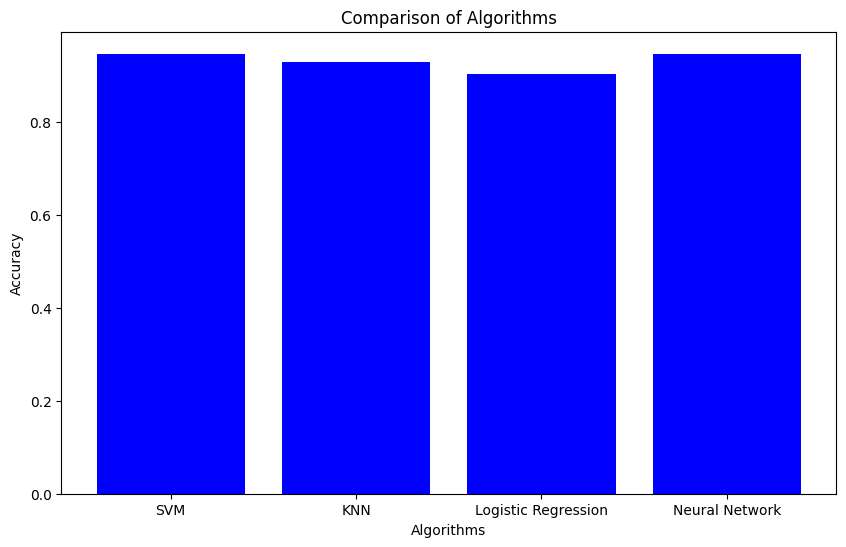

In [ ]:
# Chia dữ liệu thành tập huấn luyện (80%) và tập kiểm tra (20%)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Khởi tạo các mô hình
classifiers = {
    "SVM": SVC(kernel='rbf'),
    "KNN": KNeighborsClassifier(n_neighbors=3),
    "Logistic Regression": LogisticRegression(max_iter=500),
    "Neural Network": MLPClassifier(max_iter=500)
}

# Tạo bảng PrettyTable
t = PrettyTable(['', 'Accuracy', 'Precision', 'Recall', 'F1'])

results = []

for name, clf in classifiers.items():
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)

    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    t.add_row([name, acc, precision, recall, f1])

    results.append((name, acc))

print(t)

# Vẽ biểu đồ
output = [result[1] for result in results]
names = [result[0] for result in results]
fig = plt.figure(figsize=(10, 6))
plt.bar(names, output, color="blue")
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
plt.title('Comparison of Algorithms')
plt.show()